In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('de_accessories_1st_orders.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315583 entries, 0 to 1315582
Data columns (total 27 columns):
SCM_N_ORDER_POS_NR              1315583 non-null int64
SCM_N_ORDER_NR                  1315583 non-null int64
TDT_T_KEY_ORDER_DATE            1315583 non-null object
THR_C_KEY_ORDER_HOUR            1315583 non-null object
SIT_N_KEY_SITE                  1315583 non-null int64
CUS_N_KEY_CUSTOMER              1315583 non-null int64
SCM_SALES_BMF                   1315583 non-null object
SCM_SALES_CANCEL_BMF            1315583 non-null object
SCM_D_FINANCE_CM1               1315583 non-null object
SCM_D_FINANCE_CM2               1315583 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    1315583 non-null object
SCM_AP_ID                       1315583 non-null int64
SCM_AS_ID                       1315583 non-null int64
SCM_MASTER_AP_ID                1315583 non-null int64
SCM_IS_ZSP_ORDER                1315583 non-null int64
SCM_C_ORDER_STATUS              1315583 non-null object

In [4]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [5]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [6]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [7]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [8]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [9]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [10]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [13]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [14]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

Let's get PG3 & PG4 short_link names from our DB to make data more readable...

In [15]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [16]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [17]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [18]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [66]:
pg3.head(65)

,PG_ID,PG_SHORTLINK
0,9,hundebett
1,15,hundeleine_hundehalsband
2,16,fressnapf
3,18,hundesnacks
4,20,hundespielzeug
5,23,kratzbaum_katzenbaum
6,29,katzentoilette
7,33,fressnapf
8,34,katzensnacks
9,36,katzenspielzeug


In [19]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [20]:
pg3_dict[0] = 'null'

In [21]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [22]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(1315583, 1315583)

In [23]:
data['LEAD_PG3_NAME'] = lista_pg3

In [24]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [25]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [26]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [27]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [28]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [29]:
pg4_dict[-1] = 'null'

In [30]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [31]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(1315583, 1315583)

In [32]:
data['LEAD_PG4_NAME'] = lista_pg4

In [33]:
data[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME']].sample(5)

,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME
1068074,2068.0,katzenfutter_dose,80138.0,feringa
139975,29.0,katzentoilette,35032.0,verhalten_wohlfuehlen_katzen
989283,153317.0,sport_training,153321.0,erziehungshalsband
174271,251.0,hundefutter_trockenfutter,152662.0,greenwoods_uk
240557,2190.0,hundetransportbox,15017.0,faltbare_hundebox


In [34]:
first_orders = data[data['OSP_KO_COUNT_NET'] == 1]

In [35]:
cus_pg3_acc = {}

for i in first_orders['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = first_orders[first_orders['CUS_N_KEY_CUSTOMER'] == i]
    cus_pg3_acc[i] = cus_data['LEAD_PG3_NAME'].iloc[0]

In [36]:
cus_pg3_acc

{11895491: 'fressnapf',
 12382442: 'hundehuette_hundetuer',
 17114244: 'ungezieferschutz',
 17148622: 'katzentoilette',
 17142248: 'katzenstreu',
 17254634: 'transport',
 16996594: 'ungezieferschutz',
 16996571: 'ungezieferschutz',
 16996629: 'katzentoilette',
 17199834: 'kaefigzubehoer',
 16980347: 'balkon_garten',
 17002321: 'hundepflege',
 16980149: 'kratzbaum_katzenbaum',
 16978290: 'hundeleine_hundehalsband',
 17197162: 'hundebett',
 16977137: 'balkon_garten',
 17028120: 'hundeleine_hundehalsband',
 17002547: 'hundehuette_hundetuer',
 17113940: 'katzenstreu',
 17176570: 'katzenstreu',
 16976544: 'katzenbetten_katzenkissen',
 17114281: 'kaninchenstaelle',
 17498958: 'ungezieferschutz',
 17050177: 'hundebett',
 17142203: 'hundetransportbox',
 17000417: 'katzenbetten_katzenkissen',
 16999813: 'ungezieferschutz',
 16975535: 'katzenstreu',
 17021651: 'kratzbaum_katzenbaum',
 17015242: 'hundetransportbox',
 17008607: 'sport_training',
 17014594: 'fressnapf',
 16994983: 'ungezieferschutz

In [37]:
cus_pg3_acc_list = [cus_pg3_acc[i] for i in data['CUS_N_KEY_CUSTOMER'].values]

In [38]:
len(data['CUS_N_KEY_CUSTOMER']) == len(cus_pg3_acc_list)

True

In [39]:
data['ACC_1ST_ORD'] = cus_pg3_acc_list

In [40]:
cm2_acc_pg3_to_pg4 = data.groupby(['SCM_N_ORDER_NR', 'TDT_T_KEY_ORDER_DATE', 'CUS_N_KEY_CUSTOMER', 
                                   'OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 
                                   'ACC_1ST_ORD'], as_index=False).agg({'SCM_D_FINANCE_CM2': 'sum',
                                                                        'OSP_KO_COUNT_NET': 'mean'})

In [41]:
cm2_acc_pg3_to_pg4.sample(10)

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,ACC_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET
174770,98760411,2017-11-20,18589022,42.0,kaefigzubehoer,146.0,schlafhaeuschen,kaefigzubehoer,10.6346,1
258916,106114108,2018-03-07,17343921,45.0,futter,152.0,zwergkaninchen,kaefigzubehoer,7.3231,5
88621,94068029,2017-09-09,17506980,2068.0,katzenfutter_dose,39209.0,hills_prescription_diet,fressnapf,20.1665,3
118215,95783838,2017-10-06,17330068,2068.0,katzenfutter_dose,2071.0,felix,katzenstreu,1.8282,3
3204,88461750,2017-06-05,17000773,9.0,hundebett,74.0,decken,hundebett,12.0943,1
232363,101867410,2018-01-05,17690760,1540.0,katzenbetten_katzenkissen,1554.0,fensterbrettauflagen,katzenstreu,5.2495,4
243813,103435287,2018-01-28,18456240,251.0,hundefutter_trockenfutter,719.0,hills,hundetransportbox,8.7526,5
190421,99595766,2017-12-01,18211715,40023.0,hundebekleidung_hundemantel,40193.0,hundemantel,hundeleine_hundehalsband,16.8338,2
217188,100895238,2017-12-18,18885447,15.0,hundeleine_hundehalsband,16637.0,funktionsleine,hundeleine_hundehalsband,3.3726,1
49965,91729441,2017-07-31,17484057,15.0,hundeleine_hundehalsband,929.0,lederhalsband,hundeleine_hundehalsband,9.3235,1


In [68]:
cm2_acc_pg3_to_pg4['ACC_1ST_ORD'].unique()

array(['fressnapf', 'hundehuette_hundetuer', 'hundebett',
       'kaefigzubehoer', 'balkon_garten', 'kratzbaum_katzenbaum',
       'hundeleine_hundehalsband', 'katzentoilette', 'kaefig',
       'hundepflege', 'ungezieferschutz', 'hundespielzeug',
       'sport_training', 'hundetransportbox', 'transport',
       'aquarium_pflanzen', 'katzenbetten_katzenkissen',
       'katzenspielzeug', 'katzenstreu', 'heu_streu', 'aquarium_zubehoer',
       'aquarium', 'kaninchenstaelle', 'freigehege', 'geschenkgutscheine',
       'hundebekleidung_hundemantel', 'kaefige_freigehege', 'beleuchtung',
       'pferdeleckerli', 'spielzeug', 'einstreu', 'aquarium_pumpen',
       'wasserpflege_aquarium', 'pflege', 'aquarium_dekoration',
       'superbox_dog', 'pferdezubehoer', 'sparplan',
       'royal_canin_zugabeartikel'], dtype=object)

In [69]:
pg3[pg3['PG_SHORTLINK'].isin(cm2_acc_pg3_to_pg4['ACC_1ST_ORD'].unique())]

,PG_ID,PG_SHORTLINK
0,9,hundebett
1,15,hundeleine_hundehalsband
2,16,fressnapf
4,20,hundespielzeug
5,23,kratzbaum_katzenbaum
6,29,katzentoilette
7,33,fressnapf
9,36,katzenspielzeug
10,37,transport
12,42,kaefigzubehoer


In [42]:
crosstab_acc_ko_count_net = pd.crosstab(cm2_acc_pg3_to_pg4['ACC_1ST_ORD'], cm2_acc_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_acc_pg3_to_pg4['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int)

In [43]:
crosstab_acc_ko_count_net

OSP_KO_COUNT_NET,1,2,3,4,5
ACC_1ST_ORD,,,,,
aquarium,931,272,121,69,40
aquarium_dekoration,625,142,42,24,16
aquarium_pflanzen,1166,280,115,62,34
aquarium_pumpen,1096,218,100,58,37
aquarium_zubehoer,565,114,28,14,6
balkon_garten,3654,1125,622,437,327
beleuchtung,736,147,48,18,13
einstreu,63,23,10,6,5
freigehege,1673,490,235,134,89


In [44]:
cm2_acc_pg3_to_pg4[cm2_acc_pg3_to_pg4['CUS_N_KEY_CUSTOMER'] == 18764637]

,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,CUS_N_KEY_CUSTOMER,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,ACC_1ST_ORD,SCM_D_FINANCE_CM2,OSP_KO_COUNT_NET
199411,100040079,2017-12-07,18764637,23.0,kratzbaum_katzenbaum,2061.0,kratzbaum_gross,kratzbaum_katzenbaum,11.1199,1
245104,103630786,2018-01-30,18764637,29.0,katzentoilette,2071.0,felix,kratzbaum_katzenbaum,5.7717,2
270668,108880181,2018-04-17,18764637,2068.0,katzenfutter_dose,218624.0,royal_canin_veterinary_diet_feline_nassfutter,kratzbaum_katzenbaum,7.2158,3
272881,109465052,2018-04-26,18764637,1540.0,katzenbetten_katzenkissen,43533.0,katzenhaus,kratzbaum_katzenbaum,7.4120,4
276915,110713503,2018-05-15,18764637,252.0,katzenfutter_trockenfutter,31963.0,hills_prescription_diet,kratzbaum_katzenbaum,2.3483,5


In [45]:
next_orders = cm2_acc_pg3_to_pg4[cm2_acc_pg3_to_pg4['OSP_KO_COUNT_NET'] != 1]

In [46]:
crosstab_acc_to_pg4_orders = pd.crosstab(next_orders['ACC_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_N_ORDER_NR'],
                                          aggfunc='count').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [47]:
crosstab_acc_to_pg4_orders

LEAD_PG4_NAME,_lampen,acana,adult,affinity_ultima,agility,algenbekaempfung,alle_produkte,alle_zubehoerartikel,almo_nature,almo_nature_holistic,...,zeckenzange,zimmerkaefig,zoolove,zoolove_snacks,zooplus,zooplus_bio,zooplus_classic,zooplus_geschenkgutschein,zubehoer,zwergkaninchen
ACC_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium,0.00,0.00,0.00,0.00,0.00,0.80,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20
aquarium_dekoration,0.00,0.00,0.00,0.00,0.00,0.89,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.89,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen,0.00,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81
aquarium_pumpen,0.00,0.00,0.00,0.00,0.00,1.21,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.00,1.21
aquarium_zubehoer,0.00,0.00,0.00,0.00,0.00,1.85,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.23
balkon_garten,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.68,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12
beleuchtung,0.00,0.44,0.00,0.00,0.00,3.54,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
einstreu,0.00,0.00,0.00,0.00,0.00,0.00,2.27,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freigehege,0.00,0.21,0.00,0.00,0.21,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.00,0.11,8.86


In [48]:
crosstab_acc_to_pg4_orders.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_ultima', 'agility',
       'algenbekaempfung', 'alle_produkte', 'alle_zubehoerartikel',
       'almo_nature', 'almo_nature_holistic', 'almo_nature_labels',
       'alpha_spirit', 'animonda', 'animonda_rafine', 'animonda_rafinee',
       'antizug_maulkorb', 'anubias_wasserpflanzen', 'applaws',
       'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarien_rueckwaende', 'aquarienkies',
       'aquarium_aussenfilter', 'aquarium_filter',
       'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohren', 'augen_ohrenpflege',
       'augenpflege', 'aussergewoehnliche_katzenbetten',
       'autoschondecken', 'autoschutzgitter', 'bade_sand', 'badehaeuser',
       'baelle', 'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten', 'bewi_dog', 'biokats', 'biskuits_kekse', 'bodengrund',
       'bosch', 'bozita'

In [49]:
pg4_selection = [i for i in crosstab_acc_to_pg4_orders.columns if (crosstab_acc_to_pg4_orders[i] > 5).any()]

In [50]:
len(pg4_selection)

66

In [51]:
np.array(pg4_selection)

array(['animonda_rafine', 'antizug_maulkorb', 'aquarien_komplett',
       'aquarium_aussenfilter', 'aquarium_filter', 'aquarium_zubehoer',
       'autoschondecken', 'bade_sand', 'bosch', 'briantos', 'cats_best',
       'cellulose_einstreu', 'co3', 'einbautueren', 'erziehungshalsband',
       'futterautomaten', 'geschirre', 'golden_grey', 'grosssittich',
       'halsband', 'hamster', 'hanfstreu', 'happy_dog_premium',
       'haut_fell', 'heu', 'holzstreu', 'hundefutter_wolf_of_wilderness',
       'hundemantel', 'josera', 'kanarie', 'katzennetz',
       'katzenspielzeug_beschaeftigung', 'katzentraenke', 'kong',
       'laufraeder', 'led_aquariumleuchten', 'metall', 'muehldorfer',
       'muesli', 'natursteine', 'papagei', 'pellets',
       'pflanzen_zooplants', 'rauhfutter_einstreu', 'royal_canin',
       'royal_canin_breed', 'royal_canin_breed_cat', 'schlafhaeuschen',
       'spoton', 'stephans_muehle', 'strohstreu', 't5_leuchtstoffroehren',
       't8_leuchtstoffroehren', 'tablettenfut

In [52]:
crosstab_acc_to_pg4_orders[pg4_selection]

LEAD_PG4_NAME,animonda_rafine,antizug_maulkorb,aquarien_komplett,aquarium_aussenfilter,aquarium_filter,aquarium_zubehoer,autoschondecken,bade_sand,bosch,briantos,...,verhalten_wohlfuehlen_katzen,vogelsand,wasserpflege,wellensittich,whiskas_katzenfutter,wildvogelfutter,winterausstattung,zooplus_geschenkgutschein,zubehoer,zwergkaninchen
ACC_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium,0.20,0.20,12.95,1.79,3.19,5.38,0.00,0.00,0.80,0.00,...,0.20,0.00,3.98,0.40,0.00,0.20,0.00,0.00,0.00,0.20
aquarium_dekoration,0.00,0.00,1.34,1.79,2.23,2.68,0.00,0.00,1.79,0.45,...,0.00,0.00,3.57,0.00,0.45,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen,0.81,0.00,0.61,2.04,3.26,1.83,0.20,0.00,0.61,0.20,...,0.41,0.00,3.67,0.00,0.81,0.20,0.00,0.00,0.00,0.81
aquarium_pumpen,0.73,0.00,0.24,6.30,11.86,3.15,0.00,0.00,1.69,0.24,...,0.24,0.00,3.87,0.97,0.73,0.97,0.00,0.24,0.00,1.21
aquarium_zubehoer,1.85,0.00,0.00,1.85,4.94,2.47,0.00,0.00,0.00,0.00,...,0.00,0.00,5.56,0.00,0.00,1.85,0.00,0.00,0.00,1.23
balkon_garten,6.45,0.04,0.00,0.00,0.08,0.00,0.00,0.04,0.32,0.00,...,1.75,0.00,0.00,0.08,1.67,0.52,0.04,0.00,0.00,0.12
beleuchtung,1.77,0.00,0.44,0.88,3.98,1.33,0.00,0.00,0.00,0.00,...,0.44,0.00,2.65,0.00,0.00,0.44,0.00,0.00,0.00,0.00
einstreu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,22.73,0.00,25.00,0.00,9.09,0.00,0.00,0.00,0.00
freigehege,0.32,0.32,0.00,0.00,0.00,0.00,0.21,0.32,0.95,0.00,...,0.00,0.11,0.11,0.21,0.21,0.42,0.32,0.00,0.11,8.86


In [53]:
crosstab_acc_to_pg4_orders[pg4_selection].to_csv('rel_orders_accesories_and_pg4_selection.csv', sep=';', index=True, encoding='utf-8')

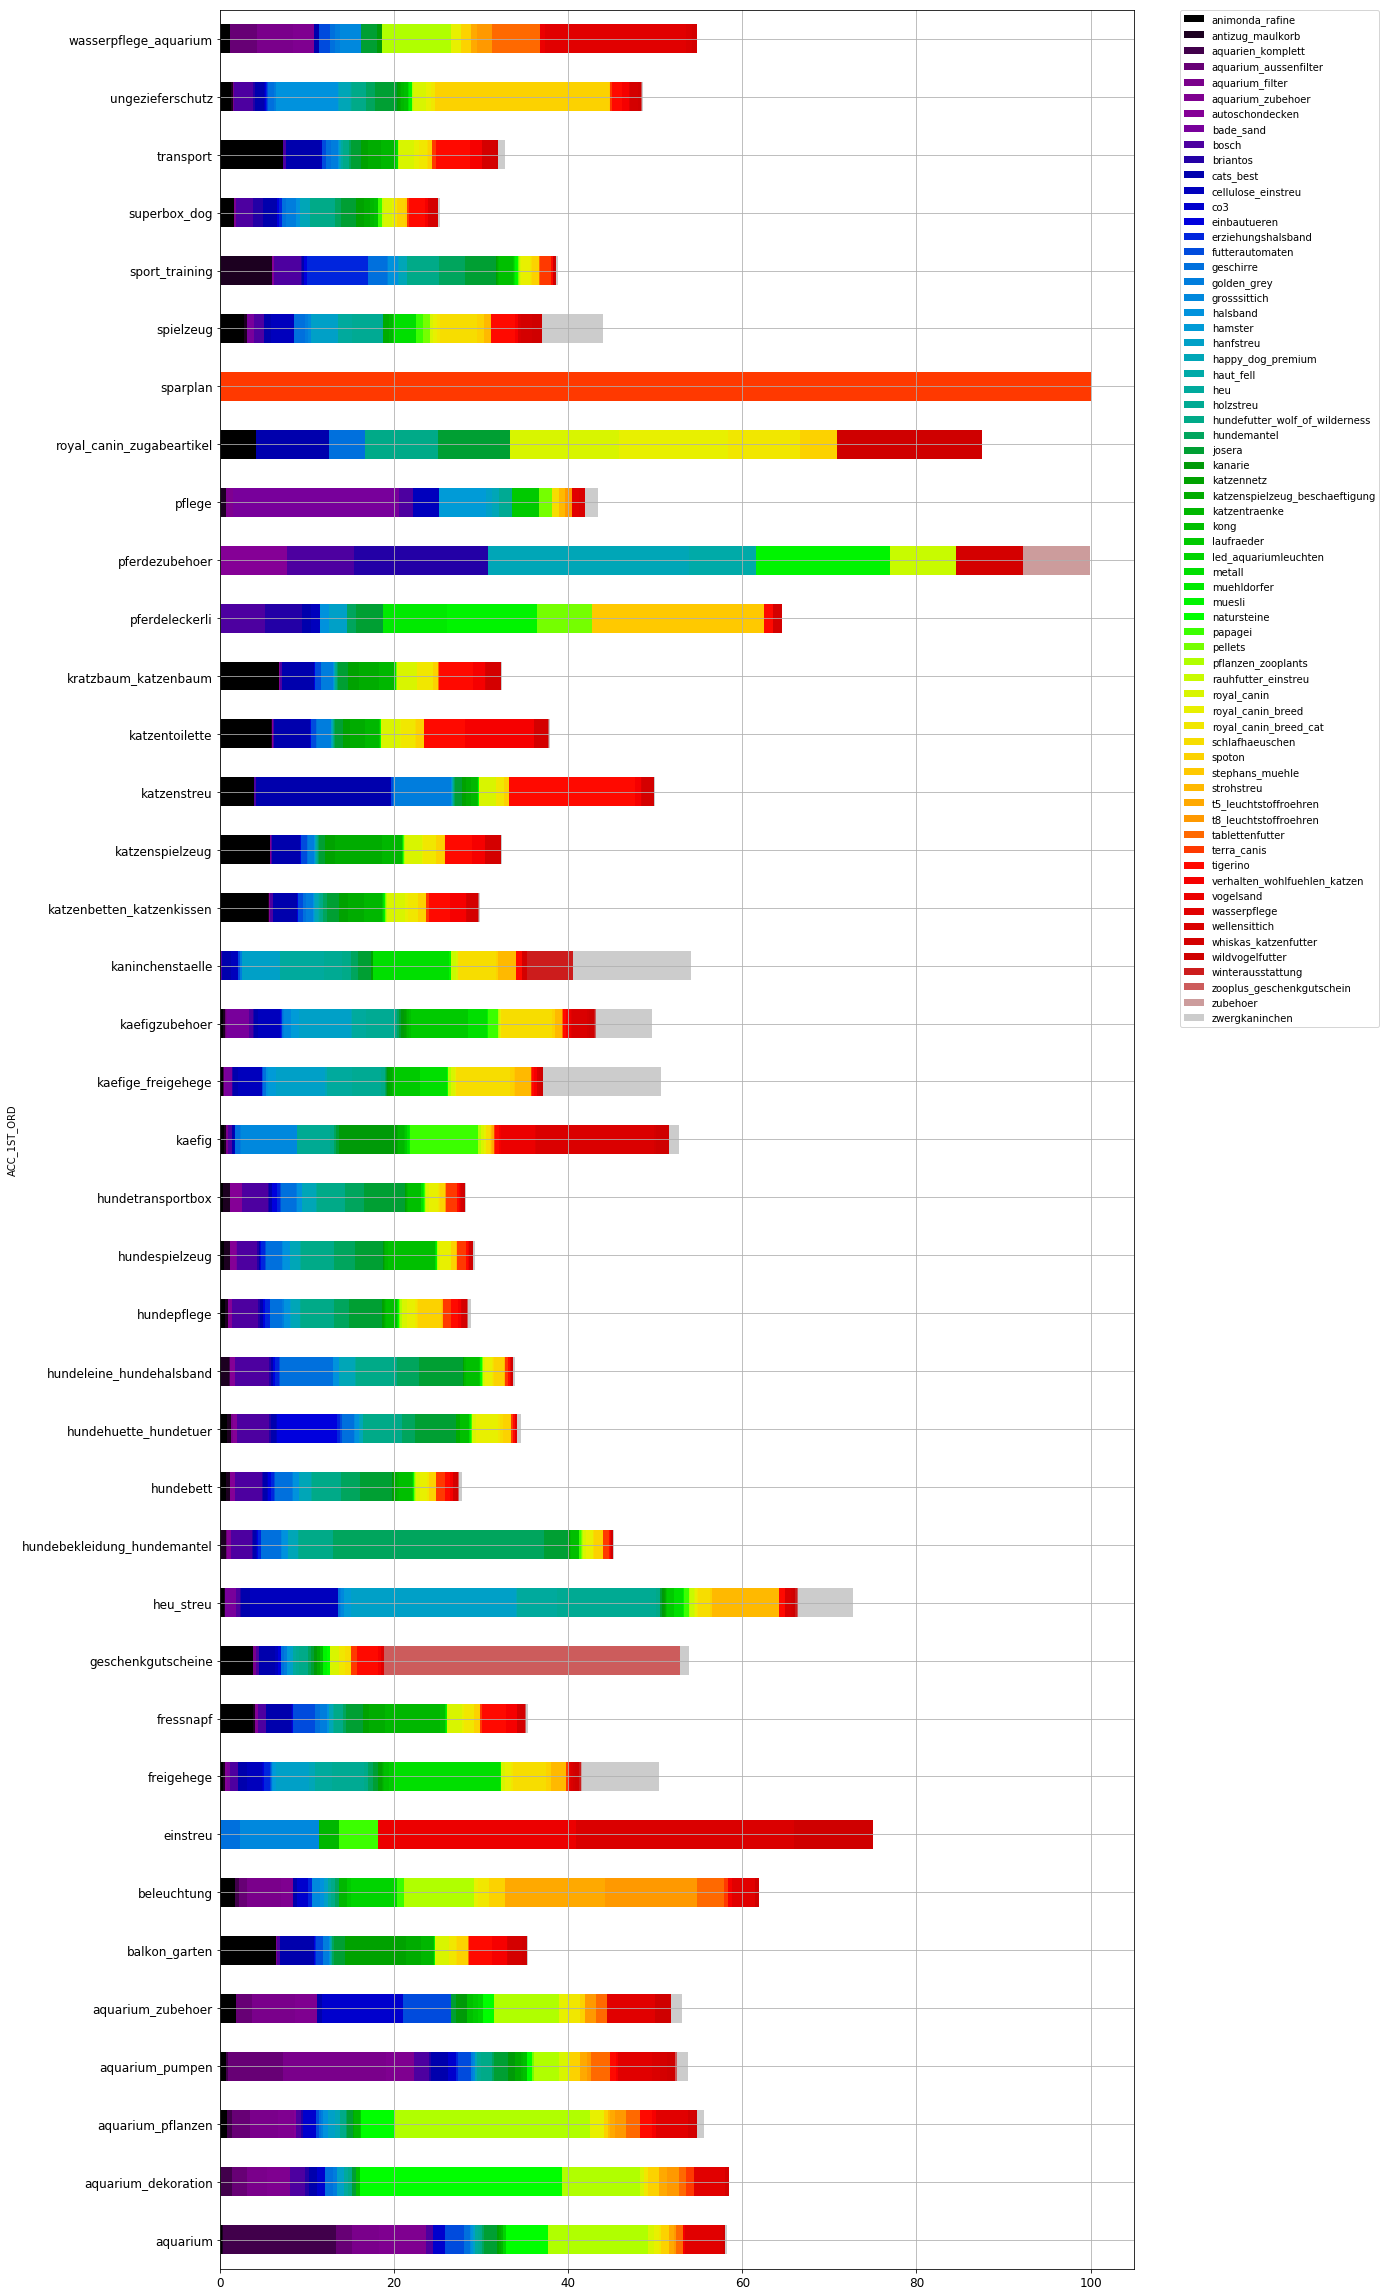

In [54]:
crosstab_acc_to_pg4_orders[pg4_selection].plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('rel_orders_accesories_and_pg4_sel')

In [55]:
crosstab_acc_ko_count_net_cm2 = pd.crosstab(cm2_acc_pg3_to_pg4['ACC_1ST_ORD'], cm2_acc_pg3_to_pg4['OSP_KO_COUNT_NET'], 
                                           values = cm2_acc_pg3_to_pg4['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).round(2)

In [56]:
crosstab_acc_ko_count_net_cm2

OSP_KO_COUNT_NET,1,2,3,4,5
ACC_1ST_ORD,,,,,
aquarium,14618.63,2484.42,944.99,453.56,231.74
aquarium_dekoration,5145.17,997.93,329.47,192.55,154.92
aquarium_pflanzen,6461.03,1793.38,823.95,447.86,303.78
aquarium_pumpen,8493.13,1733.06,617.63,327.63,259.99
aquarium_zubehoer,1586.99,632.58,175.38,86.01,25.45
balkon_garten,35184.90,7785.00,4820.27,3081.64,2335.84
beleuchtung,5111.10,902.48,254.16,80.78,64.83
einstreu,380.96,116.42,49.81,38.93,28.28
freigehege,19676.09,4191.55,2002.82,1026.43,582.48


In [57]:
crosstab_acc_to_pg4_perc_cm2 = pd.crosstab(next_orders['ACC_1ST_ORD'], next_orders['LEAD_PG4_NAME'], 
                                           values = next_orders['SCM_D_FINANCE_CM2'],
                                          aggfunc='sum').fillna(0).astype(int).apply(lambda x: x/x.sum() * 100, axis=1).round(2)

In [58]:
crosstab_acc_to_pg4_perc_cm2

LEAD_PG4_NAME,_lampen,acana,adult,affinity_ultima,agility,algenbekaempfung,alle_produkte,alle_zubehoerartikel,almo_nature,almo_nature_holistic,...,zeckenzange,zimmerkaefig,zoolove,zoolove_snacks,zooplus,zooplus_bio,zooplus_classic,zooplus_geschenkgutschein,zubehoer,zwergkaninchen
ACC_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17
aquarium_dekoration,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,4.12,0.00,0.00,0.00,0.00,0.00
aquarium_pflanzen,0.00,0.00,0.00,0.00,0.00,0.94,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.08
aquarium_pumpen,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.77
aquarium_zubehoer,0.00,0.00,0.00,0.00,0.00,1.23,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.57
balkon_garten,0.00,0.47,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17
beleuchtung,0.00,0.63,0.00,0.00,0.00,3.69,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
einstreu,0.00,0.00,0.00,0.00,0.00,0.00,3.11,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
freigehege,0.00,1.13,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.06,6.13


In [59]:
crosstab_acc_to_pg4_perc_cm2.columns.ravel()

array(['_lampen', 'acana', 'adult', 'affinity_ultima', 'agility',
       'algenbekaempfung', 'alle_produkte', 'alle_zubehoerartikel',
       'almo_nature', 'almo_nature_holistic', 'almo_nature_labels',
       'alpha_spirit', 'animonda', 'animonda_rafine', 'animonda_rafinee',
       'antizug_maulkorb', 'anubias_wasserpflanzen', 'applaws',
       'applaws_katzenfutter', 'applaws_natures_calling',
       'aquarien_komplett', 'aquarien_rueckwaende', 'aquarienkies',
       'aquarium_aussenfilter', 'aquarium_filter',
       'aquarium_unterschrank', 'aquarium_zubehoer',
       'aufbau_leistung_zucht', 'augen_ohren', 'augen_ohrenpflege',
       'augenpflege', 'aussergewoehnliche_katzenbetten',
       'autoschondecken', 'autoschutzgitter', 'bade_sand', 'badehaeuser',
       'baelle', 'baldrian_katzenspielzeug', 'barkoo_kausnacks',
       'beaphar_spezialdiaet', 'belcando', 'benek', 'beschaeftigung',
       'betten', 'bewi_dog', 'biokats', 'biskuits_kekse', 'bodengrund',
       'bosch', 'bozita'

In [60]:
pg4_cm2_selection = [i for i in crosstab_acc_to_pg4_perc_cm2.columns if (crosstab_acc_to_pg4_perc_cm2[i] > 5).any()]

In [61]:
len(pg4_cm2_selection)

79

In [62]:
crosstab_acc_to_pg4_perc_cm2[pg4_cm2_selection]

LEAD_PG4_NAME,agility,aquarien_komplett,aquarium_aussenfilter,aquarium_filter,aquarium_unterschrank,autoschondecken,bade_sand,briantos,cats_best,cellulose_einstreu,...,vogelsand,wasserpflege,weidenhoehlen,wellensittich,wildvogelfutter,winterausstattung,zooplus,zooplus_geschenkgutschein,zubehoer,zwergkaninchen
ACC_1ST_ORD,,,,,,,,,,,,,,,,,,,,,
aquarium,0.00,22.67,2.14,2.31,6.79,0.00,0.00,0.00,0.00,0.00,...,0.00,1.48,0.59,-0.05,0.02,0.00,0.00,0.00,0.00,0.17
aquarium_dekoration,0.00,2.55,6.06,0.55,0.55,0.00,0.00,0.18,0.18,0.00,...,0.00,0.79,0.00,0.00,0.00,0.00,4.12,0.00,0.00,0.00
aquarium_pflanzen,0.00,1.90,5.28,1.51,0.48,0.60,0.00,0.18,0.00,0.00,...,0.00,1.99,0.00,0.00,0.12,0.00,0.00,0.00,0.00,3.08
aquarium_pumpen,0.00,0.59,10.51,7.66,0.00,0.00,0.00,0.76,1.35,0.00,...,0.00,2.32,0.00,1.84,0.45,0.00,0.00,0.00,0.00,1.77
aquarium_zubehoer,0.00,0.00,4.70,2.24,0.00,0.00,0.00,0.00,0.22,0.00,...,0.00,4.36,0.00,0.00,0.89,0.00,0.00,0.00,0.00,1.57
balkon_garten,0.00,0.00,0.00,0.03,0.00,0.00,0.01,0.00,2.64,0.00,...,0.00,0.00,0.00,0.20,0.29,0.20,0.00,0.00,0.00,0.17
beleuchtung,0.00,0.55,4.16,1.57,0.00,0.00,0.00,0.00,1.18,0.00,...,0.00,2.28,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00
einstreu,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,24.89,0.00,0.00,33.33,5.78,0.00,0.00,0.00,0.00,0.00
freigehege,0.12,0.00,0.00,0.00,0.00,0.38,0.14,0.00,0.65,1.58,...,0.06,0.00,0.00,0.14,0.38,1.75,0.00,0.00,0.06,6.13


In [63]:
crosstab_acc_to_pg4_perc_cm2[pg4_cm2_selection].to_csv('rel_cm2_accessories_and_pg4_selection.csv', sep=';',
                                                      index=True, encoding='utf-8')

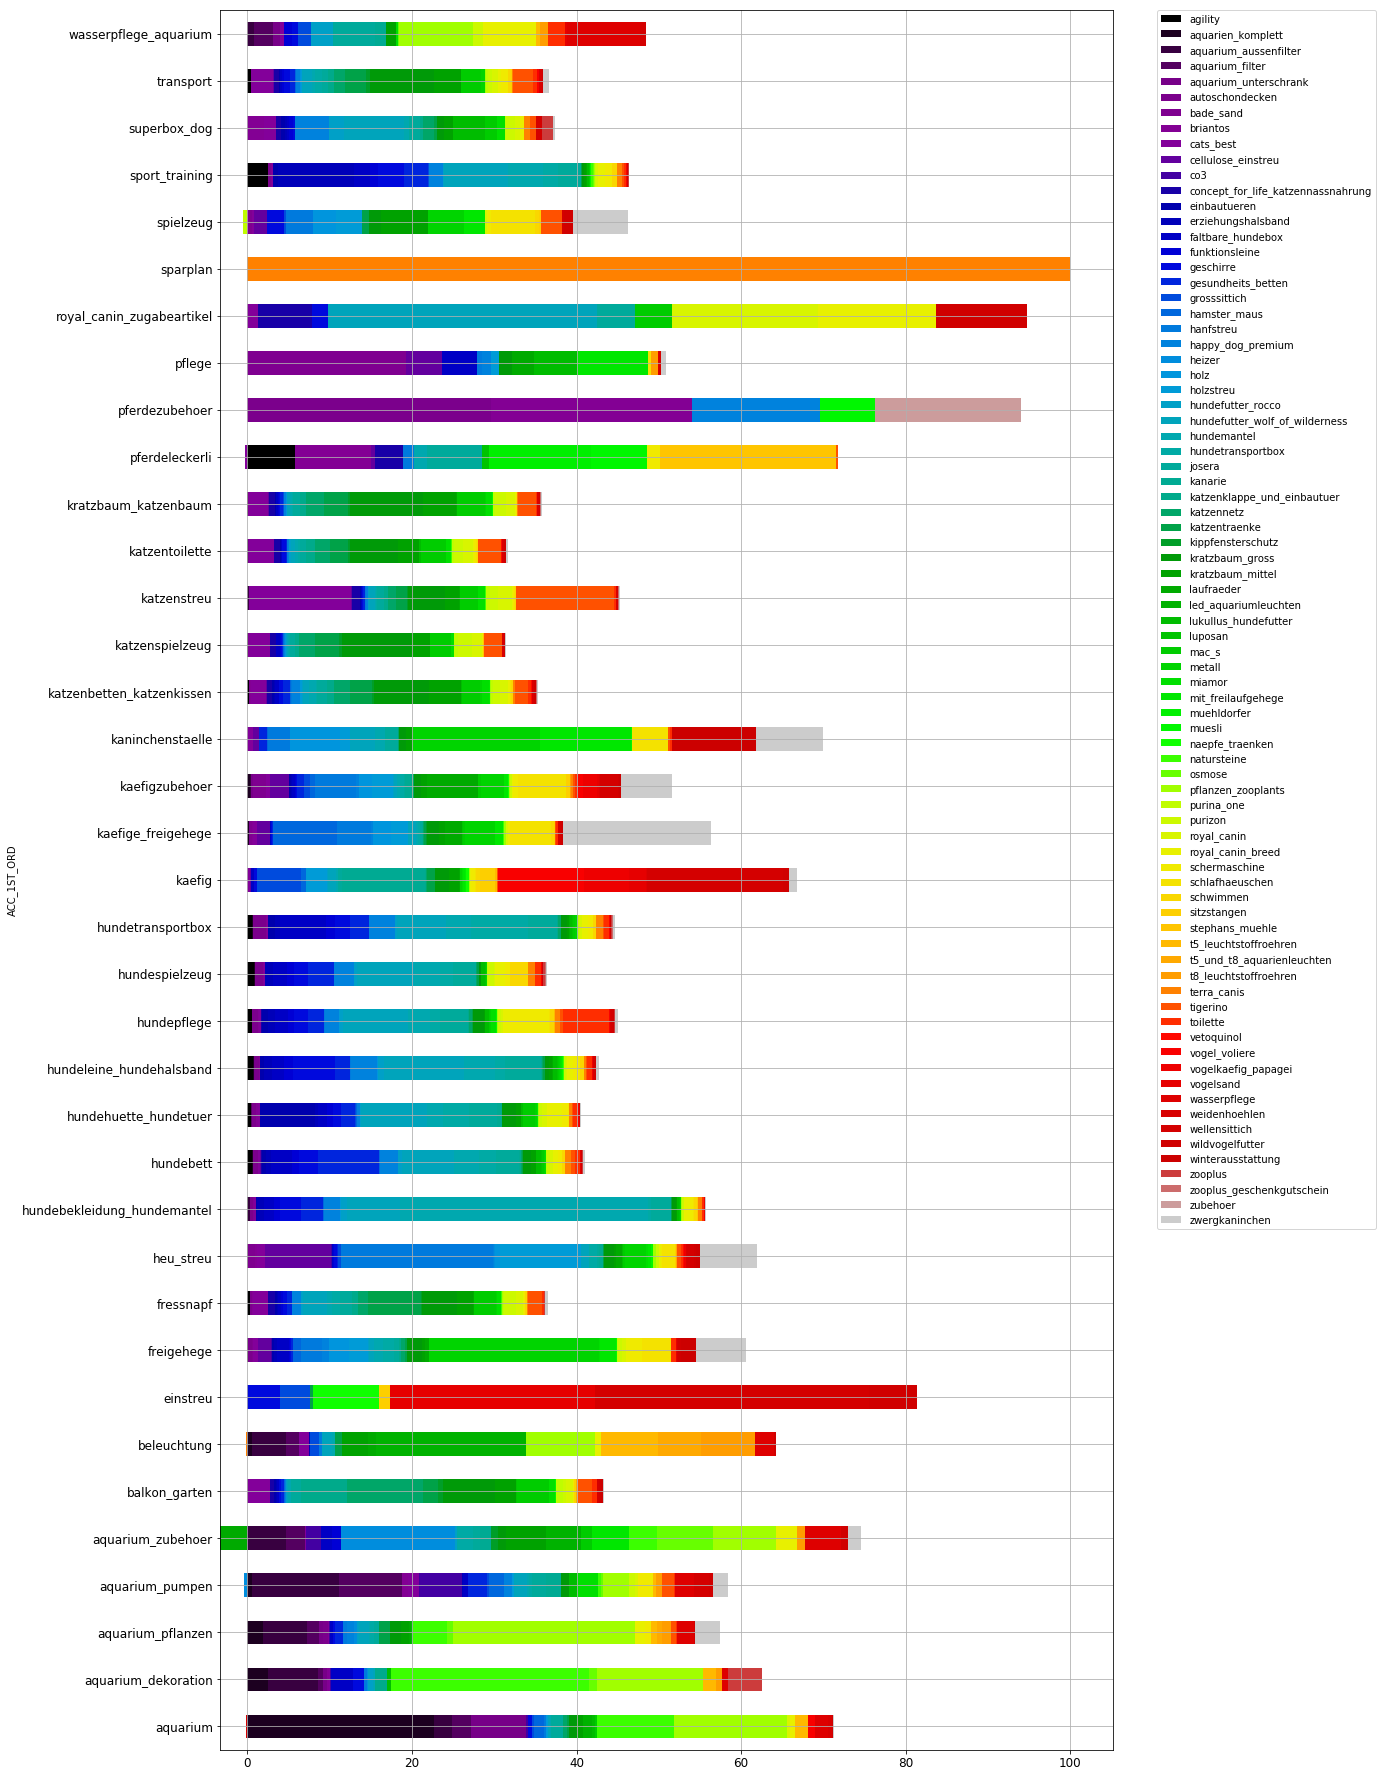

In [64]:
crosstab_acc_to_pg4_perc_cm2[(crosstab_acc_to_pg4_perc_cm2.index != 'ungezieferschutz') & 
                            (crosstab_acc_to_pg4_perc_cm2.index != 'geschenkgutscheine')][pg4_cm2_selection]\
.plot(kind='barh', stacked=True, figsize=(16, 32), grid=True, fontsize=12, colormap='nipy_spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)